In [ ]:
# Install required packages
!pip install --upgrade pip
!pip install transformers
!pip install hummingbird.ml
!pip install pandas
!pip install matplotlib
!pip install nltk
!pip install keras
!pip install tensorflow
!pip install numpy
!pip install wordcloud
!pip install seaborn

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from sklearn.manifold import TSNE
# from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import seaborn as sns

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
# import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
csv_collection = []
for dirname, _, filenames in os.walk('csv/2022'):
    for filename in filenames:
        fullpath= os.path.join(dirname, filename)
        csv_collection.append(fullpath)

In [ ]:
# file_name = "/content/drive/MyDrive/Colab Notebooks/csv/2021/tweets_2021_04.csv"
# file_name = "csv/2016/Sentiment_2016_09.csv"

In [ ]:
# df = pd.read_csv(file_name, index_col =0, lineterminator='\n', encoding = "ISO-8859-1")

In [ ]:
csv_collection

In [ ]:
 df = pd.read_csv(csv_collection.pop(), index_col=0, lineterminator='\n', encoding = "ISO-8859-1")

In [ ]:
for data in csv_collection:
    tmp = pd.read_csv(data, index_col =0, lineterminator='\n', encoding = "ISO-8859-1")
    df = pd.concat([df, tmp], axis=0)

In [ ]:
df

In [ ]:
df_new = df[["text", "pred", "label"]]

In [ ]:
df_new.loc[df_new['label'].isin(['Neutral', 'Negative', 'Positive'])]

In [ ]:
sentiment_counts = df_new.groupby(['label']).size()
print(sentiment_counts)
# print(100 * (sentiment_counts["Positive"] / (sentiment_counts["Negative"] + sentiment_counts["Positive"] + sentiment_counts["Neutral"]))) 
# print(100 * (sentiment_counts["Negative"] / (sentiment_counts["Negative"] + sentiment_counts["Positive"] + sentiment_counts["Neutral"]))) 
# print(100 * (sentiment_counts["Neutral"] / (sentiment_counts["Negative"] + sentiment_counts["Positive"] + sentiment_counts["Neutral"]))) 

label
Negative    722477
Neutral     588585
Positive    145794
dtype: int64


In [ ]:
# colors = ['r', 'c', 'g', 'y']
# fig = plt.figure(figsize=(6,6), dpi=100)
# ax = plt.subplot(111)
# #ax.set_title("2021 Sentiment Analysis")
# ax.set_title("2015 Emotion Analysis")
# sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=300, fontsize=12, label="", colors=colors, explode = (0, 0, 0, 0))

<AxesSubplot:title={'center':'2015 Emotion Analysis'}>

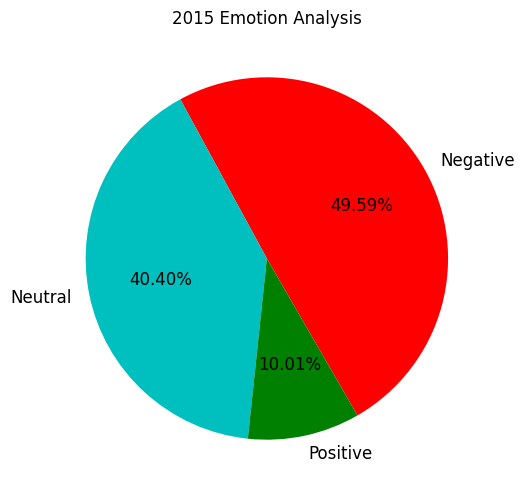

In [ ]:
colors = ['r', 'c', 'g']
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
#ax.set_title("2021 Sentiment Analysis")
ax.set_title("2015 Emotion Analysis")
sentiment_counts.plot.pie(ax=ax, autopct='%1.2f%%', startangle=300, fontsize=12, label="", colors=colors, explode = (0, 0, 0))

<AxesSubplot:xlabel='label', ylabel='count'>

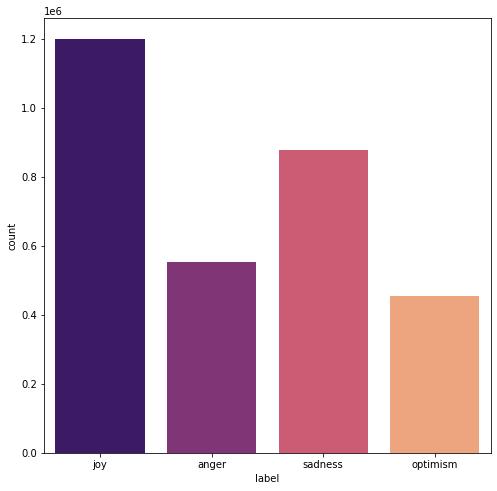

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(x="label", data=df_new, palette='magma')

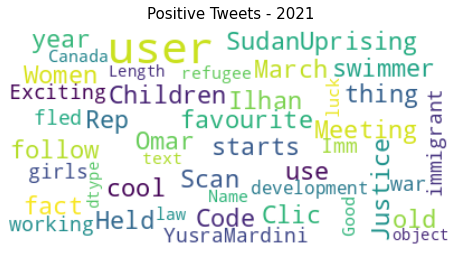

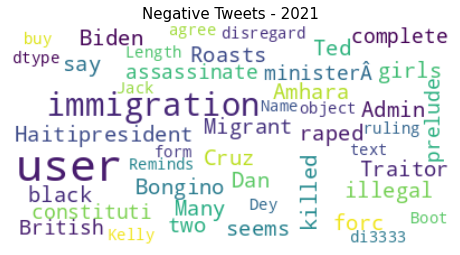

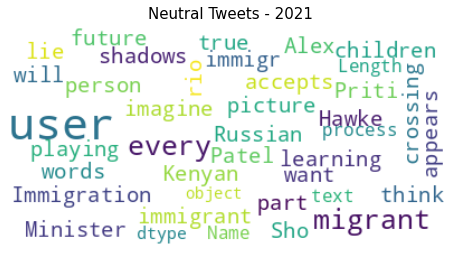

In [ ]:
# from wordcloud import WordCloud
# from wordcloud import STOPWORDS
 
# # Wordcloud with positive tweets
# positive_tweets = df['text'][df["label"] == 'Positive']
# stop_words = ["https", "co", "RT"] + list(STOPWORDS)
# positive_wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white", stopwords = stop_words, min_word_length=3).generate(str(positive_tweets))
# plt.figure(figsize=(8,10))
# plt.title("Positive Tweets - 2021",fontsize=15)
# plt.imshow(positive_wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()
 
# # Wordcloud with negative tweets
# negative_tweets = df['text'][df["label"] == 'Negative']
# stop_words = ["https", "co", "RT"] + list(STOPWORDS)
# negative_wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white", stopwords = stop_words, min_word_length=3).generate(str(negative_tweets))
# plt.figure(figsize=(8,10))
# plt.title("Negative Tweets - 2021",fontsize=15)
# plt.imshow(negative_wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

# # Wordcloud with neutral tweets
# neutral_tweets = df['text'][df["label"] == 'Neutral']
# stop_words = ["https", "co", "RT"] + list(STOPWORDS)
# neutral_wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white", stopwords = stop_words, min_word_length=3).generate(str(neutral_tweets))
# plt.figure(figsize=(8,10))
# plt.title("Neutral Tweets - 2021",fontsize=15)
# plt.imshow(neutral_wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

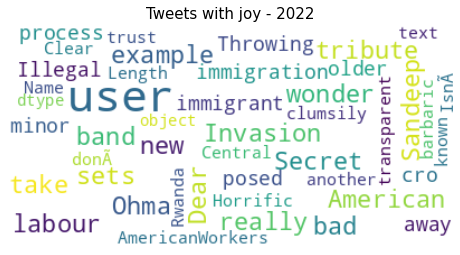

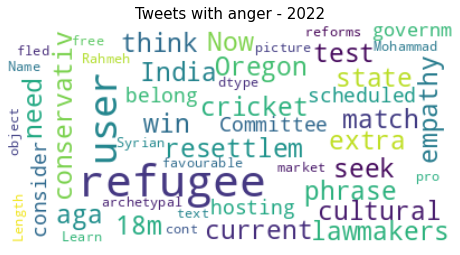

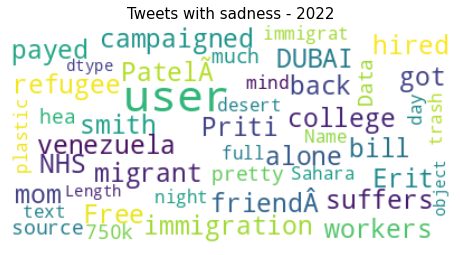

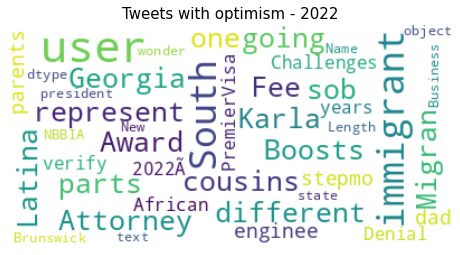

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with joy tweets
positive_tweets = df['text'][df["label"] == 'joy']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white", stopwords = stop_words, min_word_length=3).generate(str(positive_tweets))
plt.figure(figsize=(8,10))
plt.title("Tweets with joy - 2022",fontsize=15)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with anger tweets
negative_tweets = df['text'][df["label"] == 'anger']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white", stopwords = stop_words, min_word_length=3).generate(str(negative_tweets))
plt.figure(figsize=(8,10))
plt.title("Tweets with anger - 2022",fontsize=15)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with sadness tweets
neutral_tweets = df['text'][df["label"] == 'sadness']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white", stopwords = stop_words, min_word_length=3).generate(str(neutral_tweets))
plt.figure(figsize=(8,10))
plt.title("Tweets with sadness - 2022",fontsize=15)
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with optimism tweets
opt_tweets = df['text'][df["label"] == 'optimism']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
opt_wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white", stopwords = stop_words, min_word_length=3).generate(str(opt_tweets))
plt.figure(figsize=(8,10))
plt.title("Tweets with optimism - 2022",fontsize=15)
plt.imshow(opt_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()